In [13]:
import numpy as np
import matplotlib.pyplot as plt

def spline_cubico_natural(x, y):
    n = len(x) - 1
    h = np.diff(x)
    al = np.zeros(n - 1)

    for i in range(1, n):
        al[i - 1] = (3/h[i]) * (y[i+1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1])

    # Matriz tridiagonal
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    A = np.zeros((n - 1, n - 1))
    rhs = al.copy()

    for i in range(n - 1):
        A[i, i] = 2 * (h[i] + h[i+1])
        if i != 0:
            A[i, i-1] = h[i]
        if i != n - 2:
            A[i, i+1] = h[i+1]

    # Resolver el sistema A * c = al
    c = np.zeros(n + 1)
    if n > 1:
        c[1:n] = np.linalg.solve(A, rhs)

    # Calcular coeficientes b, d, a
    b = np.zeros(n)
    d = np.zeros(n)
    a = y[:-1]

    for i in range(n):
        b[i] = (y[i+1] - y[i])/h[i] - h[i]*(2*c[i] + c[i+1])/3
        d[i] = (c[i+1] - c[i]) / (3*h[i])

    return a, b, c[:-1], d

def evaluar_spline(x_eval, x, a, b, c, d):
    y_eval = np.zeros_like(x_eval)
    for i in range(len(x) - 1):
        mask = (x_eval >= x[i]) & (x_eval <= x[i+1])
        dx = x_eval[mask] - x[i]
        y_eval[mask] = a[i] + b[i]*dx + c[i]*dx**2 + d[i]*dx**3
    return y_eval

def imprimir_ecuaciones_spline(x, a, b, c, d, nombre="Spline", decimales=4):
    formato = f"{{:.{decimales}f}}"
    
    print(f"\nEcuaciones del spline para: {nombre}")
    for i in range(len(a)):
        xi = x[i]

        # Coeficientes desarrollados de (x - xi)^n
        A = d[i]
        B = 3 * d[i] * (-xi) + c[i]
        C = 3 * d[i] * xi**2 - 2 * c[i] * xi + b[i]
        D = a[i] + d[i] * (-xi)**3 + c[i] * xi**2 - b[i] * xi

        print(f"Tramo [{formato.format(x[i])}, {formato.format(x[i+1])}]:")
        print(f"Forma con desplazamiento:")
        print(f"S_{i}(x) = {formato.format(a[i])} + {formato.format(b[i])}(x - {formato.format(xi)}) + "
              f"{formato.format(c[i])}(x - {formato.format(xi)})^2 + {formato.format(d[i])}(x - {formato.format(xi)})^3")
        print(f"Forma expandida:")
        print(f"S_{i}(x) = {formato.format(A)}x^3 + {formato.format(B)}x^2 + {formato.format(C)}x + {formato.format(D)}")
        print("-" * 60)



Ecuaciones del spline para: Cuello
Tramo [0.0000, 0.1200]:
Forma con desplazamiento:
S_0(x) = 3.0000 + -1.6527(x - 0.0000) + 0.0000(x - 0.0000)^2 + -0.9668(x - 0.0000)^3
Forma expandida:
S_0(x) = -0.9668x^3 + 0.0000x^2 + -1.6527x + 3.0000
------------------------------------------------------------
Tramo [0.1200, 0.2300]:
Forma con desplazamiento:
S_1(x) = 2.8000 + -1.6945(x - 0.1200) + -0.3481(x - 0.1200)^2 + -7.0564(x - 0.1200)^3
Forma expandida:
S_1(x) = -7.0564x^3 + 2.1922x^2 + -1.9158x + 3.0105
------------------------------------------------------------
Tramo [0.2300, 0.3500]:
Forma con desplazamiento:
S_2(x) = 2.6000 + -2.0272(x - 0.2300) + -2.6767(x - 0.2300)^2 + 24.1970(x - 0.2300)^3
Forma expandida:
S_2(x) = 24.1970x^3 + -19.3726x^2 + 3.0441x + 2.6303
------------------------------------------------------------
Tramo [0.3500, 0.4600]:
Forma con desplazamiento:
S_3(x) = 2.3600 + -1.6243(x - 0.3500) + 6.0342(x - 0.3500)^2 + -18.2856(x - 0.3500)^3
Forma expandida:
S_3(x) = -18.

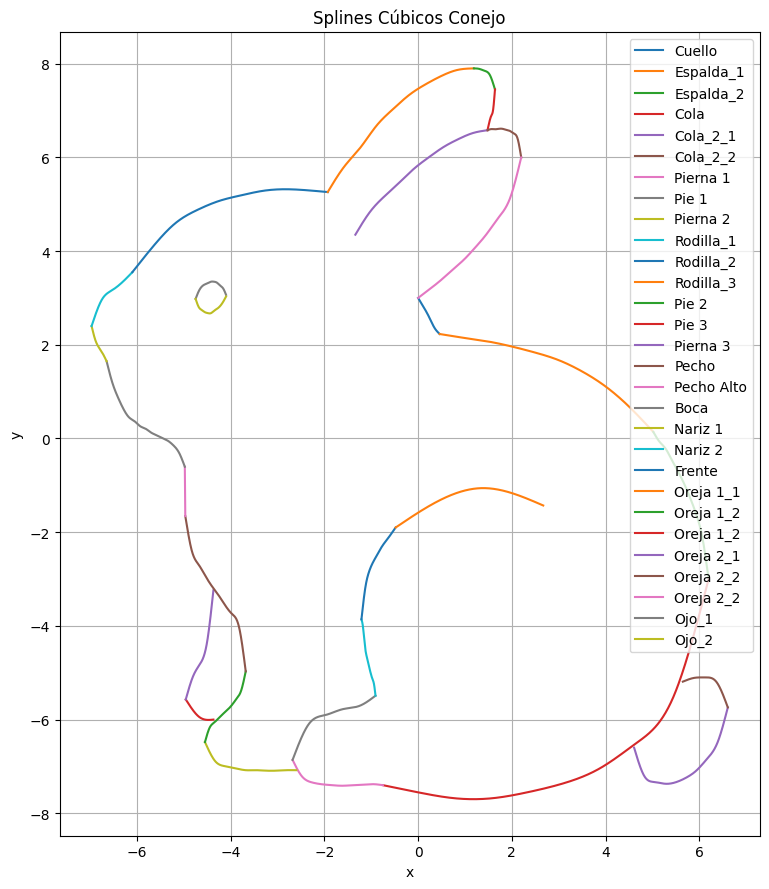

In [14]:
import numpy as np
import matplotlib.pyplot as plt

datos = [
    ("Cuello", np.array([0.0, 0.12, 0.23, 0.35, 0.46]), np.array([3, 2.8, 2.6, 2.36, 2.23])),
    ("Espalda_1", np.array([0.46, 0.964, 1.468, 1.972, 2.476, 2.98, 3.484, 3.988, 4.492, 5.02]),
                  np.array([2.23, 2.15, 2.075, 1.97, 1.84, 1.68, 1.44, 1.12, 0.69, 0.14])),
    ("Espalda_2", np.array([5.02, 5.15, 5.28, 5.41, 5.54, 5.68, 5.81, 5.94, 6.07, 6.2]),
                  np.array([0.14, -0.067, -0.214, -0.45, -0.69, -0.97, -1.277, -1.63, -2.13, -3])),
    ("Cola", np.array([-0.75, 0.02, 0.79, 1.57, 2.34, 3.11, 3.88, 4.66, 5.43, 6.2]),
            np.array([-7.4, -7.557, -7.68, -7.68,  -7.55, -7.358, -7.04, -6.5, -5.558, -3])),
    ("Cola_2_1", np.array([4.61, 4.83, 5.05, 5.28, 5.5, 5.72, 5.94, 6.17, 6.39, 6.61]),
                 np.array([-6.6, -7.21, -7.333, -7.37, -7.337, -7.24, -7.087, -6.835, -6.49, -5.74])),
    ("Cola_2_2", np.array([5.65, 5.89, 6.13, 6.37, 6.61]), np.array([-5.19, -5.11, -5.1, -5.2, -5.74])),
    ("Pierna 1", np.array([-2.68, -2.49, -2.27, -2.06, -1.84, -1.62, -1.4, -1.19, -0.97, -0.75]),
                  np.array([-6.86, -7.2, -7.34, -7.38, -7.4, -7.412, -7.4, -7.39, -7.378, -7.4])),
    ("Pie 1", np.array([-2.68, -2.33, -1.97, -1.62, -1.26, -0.91]),
              np.array([-6.86, -6.09, -5.9, -5.78, -5.71, -5.49])),
    ("Pierna 2", np.array([-4.55, -4.33, -4.12, -3.9, -3.68, -3.47, -3.25, -3.03, -2.82, -2.6]),
                 np.array([-6.48, -6.89, -6.995, -7.04, -7.08, -7.08, -7.09, -7.09, -7.08, -7.08])),
    ("Rodilla_1", np.array([-1.21, -1.18, -1.14, -1.11, -1.08, -1.04, -1.01, -0.98, -0.94, -0.91]),
                  np.array([-3.86, -4, -4.4, -4.6, -4.723, -4.9, -5.02, -5.12, -5.255, -5.49])),
    ("Rodilla_2", np.array([-1.21, -1.13, -1.05, -0.97, -0.89, -0.8, -0.72, -0.64, -0.56, -0.48]),
                  np.array([-3.86, -3.2, -2.85, -2.656, -2.51, -2.35, -2.23, -2.126, -2.014, -1.9])),
    ("Rodilla_3", np.array([-0.48, 1.34, 2.67]), np.array([-1.9, -1.06, -1.43])),
    ("Pie 2", np.array([-4.55, -4.45, -4.36, -4.26, -4.16, -4.07, -3.97, -3.87, -3.78, -3.68]),
              np.array([-6.48, -6.172, -6.068, -5.973, -5.874, -5.793, -5.682, -5.548, -5.388, -4.97])),
    ("Pie 3", np.array([-4.96, -4.67, -4.37]), np.array([-5.57, -5.946, -6.0])),
    ("Pierna 3", np.array([-4.96, -4.81, -4.66, -4.51, -4.37]),
                 np.array([-5.57, -5.09, -4.82, -4.376, -3.24])),
    ("Pecho", np.array([-4.97, -4.83, -4.68, -4.54, -4.4, -4.25, -4.11, -3.97, -3.82, -3.68]),
              np.array([-1.656, -2.4, -2.7, -2.936, -3.155, -3.36, -3.574, -3.747, -4.037, -4.97])),
    ("Pecho Alto", np.array([-4.98, -4.97]), np.array([-0.603, -1.656])),
    ("Boca", np.array([-6.65, -6.53, -6.41, -6.29, -6.17, -6.05, -5.93, -5.82, -5.7, -5.58, -5.46, -5.34, -5.22, -5.1, -4.98]),
             np.array([1.65, 1.2, 0.884, 0.63, 0.45, 0.366, 0.26, 0.21, 0.126, 0.07, 0.01, -0.05, -0.15, -0.31, -0.603])),
    ("Nariz 1", np.array([-6.97, -6.89, -6.81, -6.73, -6.65]),
                np.array([2.4, 2.1, 1.936, 1.81,1.65])),
    ("Nariz 2", np.array([-6.97, -6.75, -6.54, -6.32, -6.1]),
                np.array([2.4, 2.965, 3.16, 3.33,3.55])),
    ("Frente", np.array([-6.1, -5.64, -5.17, -4.71, -4.25, -3.78, -3.32, -2.86, -2.39, -1.93]),
               np.array([3.55, 4.12, 4.605, 4.88, 5.07, 5.19, 5.285, 5.32, 5.3,
                         5.26])),
    ("Oreja 1_1", np.array([-1.93, -1.58, -1.24, -0.89, -0.54, -0.2, 0.15, 0.5, 0.84, 1.19]),
                  np.array([5.26, 5.8, 6.2, 6.675, 7.027, 7.326, 7.555, 7.74, 7.867,7.9])),
    ("Oreja 1_2", np.array([1.19, 1.3, 1.42, 1.53, 1.64]),
                  np.array([7.9, 7.89, 7.848, 7.76, 7.45])),
    ("Oreja 1_2", np.array([1.48, 1.52, 1.56, 1.6, 1.64]),
                  np.array([6.58, 6.755, 6.886, 7.013, 7.45])),
    ("Oreja 2_1", np.array([-1.34, -1.03, -0.71, -0.4, -0.09, 0.23, 0.54, 0.85, 1.17, 1.48]),
                  np.array([4.35, 4.834, 5.177, 5.464, 5.757, 6.004, 6.22, 6.386, 6.52, 6.58])),
    ("Oreja 2_2", np.array([1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 1.96, 2.04, 2.12, 2.2]),
                  np.array([6.58, 6.604, 6.6, 6.61, 6.61, 6.587, 6.564, 6.51, 6.41, 6])),
    ("Oreja 2_2", np.array([0.0, 0.24, 0.49, 0.73, 0.98, 1.22, 1.47, 1.71, 1.96, 2.2]),
                  np.array([3, 3.183, 3.383, 3.597, 3.82, 4.078, 4.375, 4.708, 5.124, 6])),



    ("Ojo_1", np.array([-4.75, -4.68, -4.62, -4.55, -4.49, -4.42, -4.36, -4.29, -4.23, -4.16, -4.1]),
              np.array([2.98, 3.15, 3.24, 3.29, 3.314, 3.347, 3.347, 3.323, 3.266, 3.2, 3.066])),
    ("Ojo_2", np.array([-4.75, -4.68, -4.62, -4.55, -4.49, -4.42, -4.36, -4.29, -4.23, -4.17, -4.1]),
              np.array([2.98, 2.8, 2.743, 2.695, 2.676, 2.676, 2.724, 2.77, 2.823, 2.904, 3.03])),

]

plt.figure(figsize=(15, 9))

for nombre, x, y in datos:
    a, b, c, d = spline_cubico_natural(x, y)
    x_fino = np.linspace(min(x), max(x), 500)
    y_fino = evaluar_spline(x_fino, x, a, b, c, d)

    plt.plot(x_fino, y_fino)
    imprimir_ecuaciones_spline(x, a, b, c, d, nombre)
    # plt.plot(x, y, 'o')

plt.title('Splines Cúbicos Conejo')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend([nombre for nombre, _, _ in datos])
plt.tight_layout()
plt.show()
